# **<center><span style= "color:#2F539B;">normalization scaling / transformation</span></center>**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [2]:
# gererate non normal data (exponential distribution)
np.random.seed(0)
data = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(data=data, columns=['values'])

In [3]:
df

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


In [4]:
df.shape

(1000, 1)

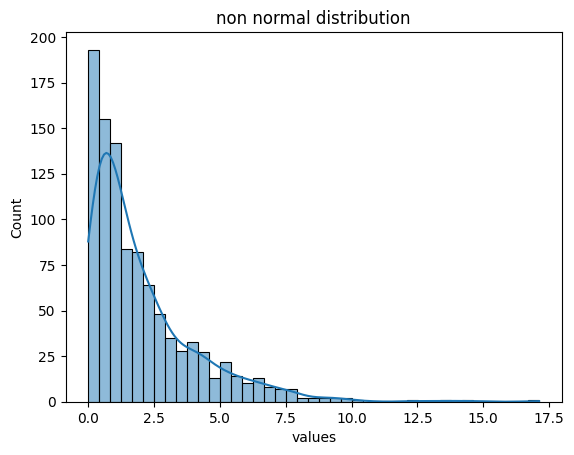

In [6]:
sns.histplot(df['values'], kde=True)
plt.title("non normal distribution")
plt.show()

In [27]:
pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
qt_normal = QuantileTransformer(output_distribution='normal')

# boxcox have positve values or data
df['box-cox'] = pt_boxcox.fit_transform(df[['values']])
df['yeo-johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['qt-normal'] = qt_normal.fit_transform(df[['values']])

In [28]:
df.head(10)

,values,box-cox,yeo-johnson,qt-normal
0,1.591749,0.158969,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.154930
5,2.076319,0.411617,0.467939,0.397918
6,1.151038,-0.127995,-0.158552,-0.104318
7,4.447049,1.232549,1.295011,1.184447
8,6.629824,1.727386,1.698857,1.786156
9,0.967204,-0.272997,-0.329957,-0.254902


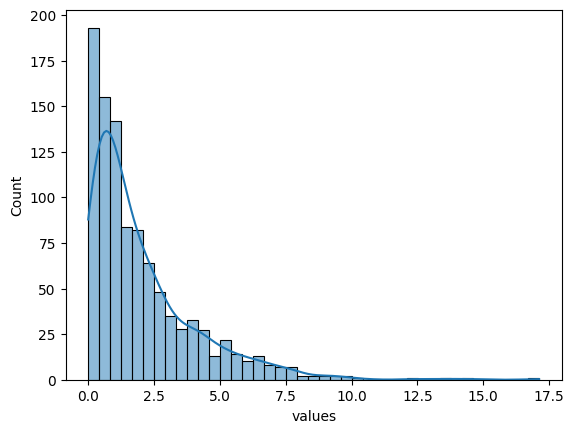

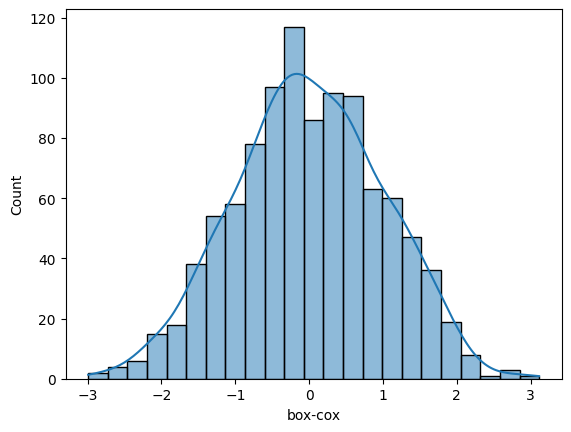

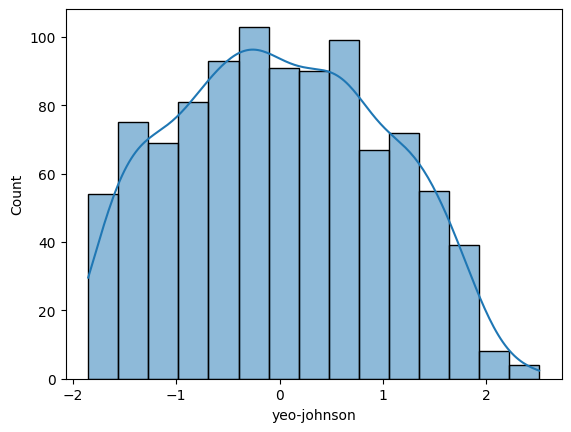

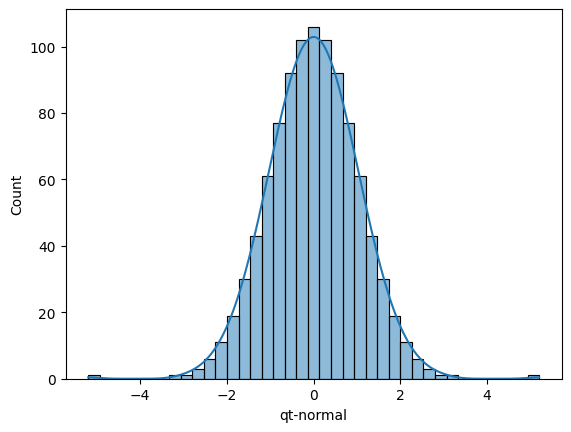

In [29]:
#create hostogram for all columns
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

# normalization

In [ ]:
from sklearn.preprocessing import Normalizer

# L2 normalization
data = [[1,1,1],[1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l2')
normalized = normalizer.fit_transform(data)
normalized

array([[0.57735027, 0.57735027, 0.57735027],
       [0.70710678, 0.70710678, 0.        ],
       [1.        , 0.        , 0.        ]])

In [31]:
# L1 normalization
data = [[1,1,1],[1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l1')
normalized = normalizer.fit_transform(data)
normalized

array([[0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.5       , 0.        ],
       [1.        , 0.        , 0.        ]])

# log transformation

In [32]:
import numpy as np
import pandas as pd

In [33]:
data = {
    'values': [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]
}
df = pd.DataFrame(data)

In [34]:
df

,values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,2000


<Axes: ylabel='Count'>

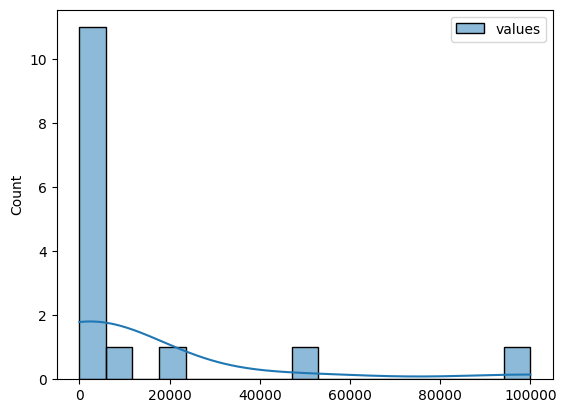

In [ ]:
sns.histplot(data=df, kde=True,)

In [36]:
df['log_values'] = np.log(df['values'])

In [38]:
df

,values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


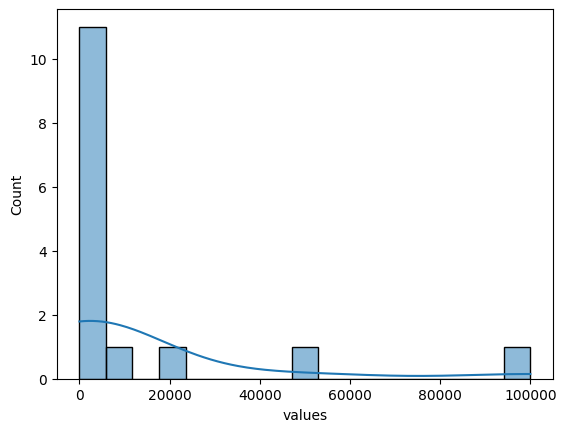

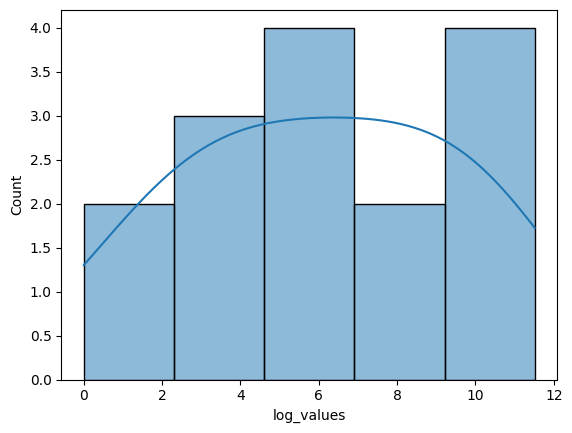

In [40]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()